In [1]:
import os
import glob
import pandas as pd

def convert_csv_to_parquet(path):
    # Find all subdirectories within the specified path
    channels = glob.glob(os.path.join(path, "*/"))

    for channel in channels:
        # Get all CSV files in the current channel
        csv_files = glob.glob(os.path.join(channel, "*.csv"))

        for idx, csv_file in enumerate(csv_files, 1):
            # Read the CSV file
            df = pd.read_csv(csv_file, sep=',', header=None)

            # Set the column names as strings
            df.columns = [f'col_{i}' for i in range(len(df.columns))]

            # Create a Parquet file name based on the CSV file name
            parquet_file = os.path.splitext(csv_file)[0] + ".parquet"

            # Write the Parquet file
            df.to_parquet(parquet_file, index=False)

            # Remove the original CSV file
            os.remove(csv_file)

            # Print the file name every 100 files
            if idx % 100 == 0:
                print(f"Processed {idx} files in {channel}. Latest file: {csv_file}")

        print(f"Converted CSV files in {channel} to Parquet format and removed original CSV files")


In [2]:
data_path = './Raw_data/'
convert_csv_to_parquet(data_path)

Processed 100 files in ./Raw_data/channel_1/. Latest file: ./Raw_data/channel_1/File_48.csv
Processed 200 files in ./Raw_data/channel_1/. Latest file: ./Raw_data/channel_1/File_102.csv
Processed 300 files in ./Raw_data/channel_1/. Latest file: ./Raw_data/channel_1/File_297.csv
Processed 400 files in ./Raw_data/channel_1/. Latest file: ./Raw_data/channel_1/File_174.csv
Converted CSV files in ./Raw_data/channel_1/ to Parquet format and removed original CSV files
Processed 100 files in ./Raw_data/channel_0/. Latest file: ./Raw_data/channel_0/File_48.csv
Processed 200 files in ./Raw_data/channel_0/. Latest file: ./Raw_data/channel_0/File_102.csv
Processed 300 files in ./Raw_data/channel_0/. Latest file: ./Raw_data/channel_0/File_297.csv
Processed 400 files in ./Raw_data/channel_0/. Latest file: ./Raw_data/channel_0/File_174.csv
Converted CSV files in ./Raw_data/channel_0/ to Parquet format and removed original CSV files
Processed 100 files in ./Raw_data/channel_3/. Latest file: ./Raw_data/

In [3]:
import matplotlib.pyplot as plt

def plot_signals(path, file_number):
    """
    Plot data from four channels based on a specific file number.
    
    :param path: The base directory where channel subdirectories are located.
    :param file_number: The specific file number to plot.
    """
    # Define channel names for better readability in the plots
    channel_names = [
        "Trigger (Machine)",
        "Flat Response Microphone (Front)",
        "Flat Response Microphone (Rear)",
        "Resonant Microphone"
    ]
    
    # Find all subdirectories within the specified path
    channels = glob.glob(os.path.join(path, "*/"))
    
    # Ensure the channels are sorted to match the order in channel_names
    channels.sort()
    
    fig, axs = plt.subplots(4, 1, figsize=(10, 12))  # Adjusted for better visualization
    fig.tight_layout(pad=3.0)  # Add spacing between plots

    for i, channel in enumerate(channels):
        # construct the file name
        parquet_file = os.path.join(channel, f"File_{file_number}.parquet")  
        
        # Check if the Parquet file exists
        if os.path.exists(parquet_file):
            # Read the Parquet file
            df = pd.read_parquet(parquet_file)

            # Plot the monodimensional data
            axs[i].plot(df.iloc[:, 0])  # the data is in the first column
            axs[i].set_title(channel_names[i])
            axs[i].set_xlabel('Sample Index')  # Assuming the index represents samples
            axs[i].set_ylabel('Amplitude')  # Adjust based on what the data represents
        else:
            print(f"File not found: {parquet_file}")
            axs[i].set_title(f'{channel_names[i]} - File not found')

    plt.show()


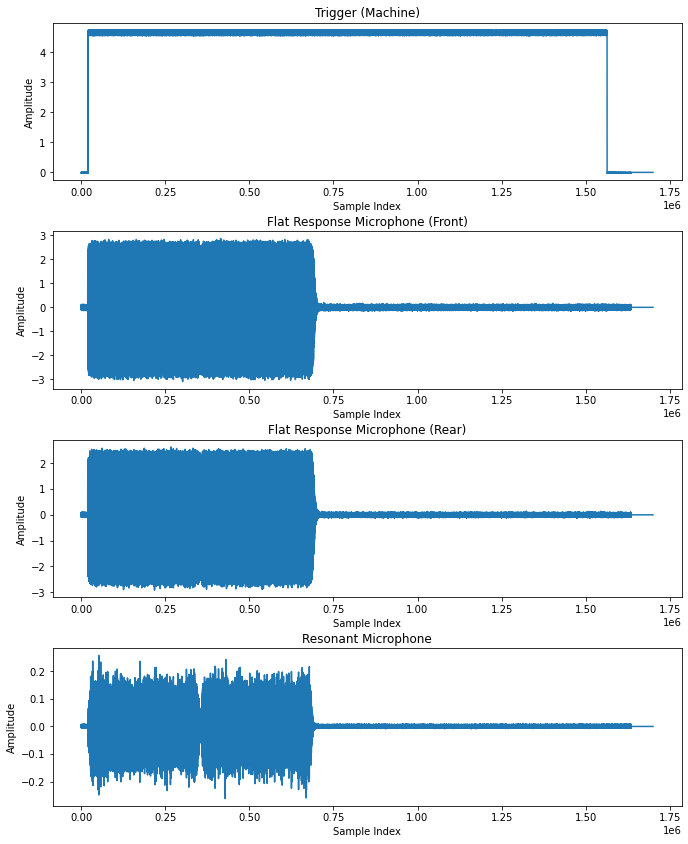

In [4]:
# Last layer
plot_signals(path=data_path, file_number=399)